NB: Avoid running from VS Code. Runs better in a browser due to widgets and such.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import os
import sys
import nibabel as nib
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from IPython.display import HTML
import scipy.stats as stats
from scipy.optimize import curve_fit
import sklearn.metrics
from sklearn.metrics import mean_squared_error

sys.path.append('../src')
from ScanData import ScanData
from ImageSliceViewer3D import ImageSliceViewer3D
import utils

# LABEL SPECS FOR BRAIN REGIONS

In [3]:
labels_ROIs = {
    'CC' : 1, # corpus callosum
    'CING-L' : 2, #cingulum left
    'CING-R' : 3, #cingulum right
}

# PLOTTING SPECS

In [4]:
size_font = 11

plt.rc('font', family='serif')
plt.rc('font', size=size_font)        # controls default text sizes
plt.rc('axes', titlesize=size_font)   # fontsize of the axes title
plt.rc('axes', labelsize=size_font)   # fontsize of the x and y labels
plt.rc('xtick', labelsize=size_font)  # fontsize of the tick labels
plt.rc('ytick', labelsize=size_font)  # fontsize of the tick labels
plt.rc('legend', fontsize=size_font)  # legend fontsize
plt.rc('figure', titlesize=size_font) # fontsize of the figure title

figsize_3x1 = (7.5, 3)
figsize_1x1 = (2.5, 3)
figsize_1x1_wide = (3.75, 3)


lw = 2
s = 36#13

marker_1 = 's'
marker_2 = '^'#'x'#'o'

# PATHS

In [5]:
path_data = '../data/ex_vivo/'
path_figures = '../figures/'

# WHICH SCAN SERIES TO ANALYSE

### SCAN SERIES 1

In [8]:
# path_preprocessed_a = os.path.join(path_data, 'scan_series_1_preprocessed')

# #### images and schemes
# path_ROIs_a = os.path.join(path_preprocessed_a, 'static_mask.nii.gz')

# # M0694
# path_M0694_dwi_images = os.path.join(path_preprocessed_a, 'M0694-N8841-4-1_DtiStandard_PGSE_deg=0_TE=36_unringed_registered-com-trans-rigid-affine.nii')
# path_M0694_dwi_scheme = os.path.join(path_preprocessed_a, 'M0694-N8841-4-1_DtiStandard_PGSE_deg=0_TE=36_effbvector_registered.scheme')

# # M0695
# path_M0695_dwi_images = os.path.join(path_preprocessed_a, 'M0695-N8841-4-1_DtiStandard_PGSE_deg=90_TE=36_unringed_registered-com-trans-rigid-affine.nii')
# path_M0695_dwi_scheme = os.path.join(path_preprocessed_a, 'M0695-N8841-4-1_DtiStandard_PGSE_deg=90_TE=36_effbvector_registered.scheme')

# # M0697
# path_M0697_dwi_images = os.path.join(path_preprocessed_a, 'M0697-N8841-4-1_DtiStandard_PGSE_deg=90_TE=36_unringed_registered-com-trans-rigid-affine.nii')
# path_M0697_dwi_scheme = os.path.join(path_preprocessed_a, 'M0697-N8841-4-1_DtiStandard_PGSE_deg=90_TE=36_effbvector_registered.scheme')

# # M0698
# path_M0698_dwi_images = os.path.join(path_preprocessed_a, 'M0698-N8841-4-1_DtiStandard_PGSE_deg=60_TE=36_unringed_registered-com-trans-rigid-affine.nii')
# path_M0698_dwi_scheme = os.path.join(path_preprocessed_a, 'M0698-N8841-4-1_DtiStandard_PGSE_deg=60_TE=36_effbvector_registered.scheme')

# #### INITIALIZE SCAN-OBJECTS
# scanM0694 = ScanData(
#     path_M0694_dwi_images, 
#     path_M0694_dwi_scheme, 
#     path_ROIs_a, 
#     labels_ROIs, 
#     tag='0 deg, PGSE', 
#     marker='.'
# )

# scanM0695 = ScanData(
#     path_M0695_dwi_images, 
#     path_M0695_dwi_scheme, 
#     path_ROIs_a, 
#     labels_ROIs, 
#     tag='90 deg, PGSE', 
#     marker='.'
# )

# scanM0697 = ScanData(
#     path_M0697_dwi_images, 
#     path_M0697_dwi_scheme, 
#     path_ROIs_a, 
#     labels_ROIs, 
#     tag='30 deg, PGSE', 
#     marker='.'
# )

# scanM0698 = ScanData(
#     path_M0698_dwi_images, 
#     path_M0698_dwi_scheme, 
#     path_ROIs_a, 
#     labels_ROIs, 
#     tag='60 deg, PGSE', 
#     marker='.'
# )

# scans_a = [scanM0694, scanM0695, scanM0697, scanM0698,]
# scan_sessions = [scans_a]
# idxs_scan_series = ['1']

### SCAN SERIES 2

In [9]:
path_preprocessed_b = os.path.join(path_data, 'scan_series_2_preprocessed/')

#### images and schemes
path_ROIs_b = os.path.join(path_preprocessed_b, 'static_mask.nii.gz')

# M0714
path_M0714_dwi_images = os.path.join(path_preprocessed_b, 'M0714-N8841-4-1_DtiStandard_PGSE_deg=0_TE=36_unringed_registered-com-trans-rigid-affine.nii')
path_M0714_dwi_scheme = os.path.join(path_preprocessed_b, 'M0714-N8841-4-1_DtiStandard_PGSE_deg=0_TE=36_effbvector_registered.scheme')

# M0715
path_M0715_dwi_images = os.path.join(path_preprocessed_b, 'M0715-N8841-4-1_DtiStandard_PGSE_deg=90_TE=36_unringed_registered-com-trans-rigid-affine.nii')
path_M0715_dwi_scheme = os.path.join(path_preprocessed_b, 'M0715-N8841-4-1_DtiStandard_PGSE_deg=90_TE=36_effbvector_registered.scheme')

# M0716
path_M0716_dwi_images = os.path.join(path_preprocessed_b, 'M0716-N8841-4-1_DtiStandard_PGSE_deg=30_TE=36_unringed_registered-com-trans-rigid-affine.nii')
path_M0716_dwi_scheme = os.path.join(path_preprocessed_b, 'M0716-N8841-4-1_DtiStandard_PGSE_deg=30_TE=36_effbvector_registered.scheme')

# M0717
path_M0717_dwi_images = os.path.join(path_preprocessed_b, 'M0717-N8841-4-1_DtiStandard_PGSE_deg=60_TE=36_unringed_registered-com-trans-rigid-affine.nii')
path_M0717_dwi_scheme = os.path.join(path_preprocessed_b, 'M0717-N8841-4-1_DtiStandard_PGSE_deg=60_TE=36_effbvector_registered.scheme')

#### INITIALIZE SCAN_OBJECTS
scanM0714 = ScanData(
    path_M0714_dwi_images, 
    path_M0714_dwi_scheme, 
    path_ROIs_b, 
    labels_ROIs, 
    tag='0 deg, PGSE', 
    marker='.'
)

scanM0715 = ScanData(
    path_M0715_dwi_images, 
    path_M0715_dwi_scheme, 
    path_ROIs_b, 
    labels_ROIs, 
    tag='90 deg, PGSE', 
    marker='.'
)

scanM0716 = ScanData(
    path_M0716_dwi_images, 
    path_M0716_dwi_scheme, 
    path_ROIs_b, 
    labels_ROIs, 
    tag='30 deg, PGSE', 
    marker='.'
)

scanM0717 = ScanData(
    path_M0717_dwi_images, 
    path_M0717_dwi_scheme, 
    path_ROIs_b, 
    labels_ROIs, 
    tag='60 deg, PGSE', 
    marker='.'
)

scans_b = [scanM0714, scanM0715, scanM0716, scanM0717,]
scan_sessions = [scans_b]
idxs_scan_series = ['2']

# INSPECT IMAGES

In [14]:
%matplotlib widget

plt.close('all')

idx_oi = 0 # b-value

for scans in scan_sessions[:1]:    
    for scan in scans:

        ImageSliceViewer3D([scan.V[..., idx_oi]], title=f'{scan.tag} at b = {scan.bvals[idx_oi][0]}')

interactive(children=(RadioButtons(description='Slice plane:', options=('x-y', 'y-z', 'z-x'), value='x-y'), Ou…

interactive(children=(RadioButtons(description='Slice plane:', options=('x-y', 'y-z', 'z-x'), value='x-y'), Ou…

interactive(children=(RadioButtons(description='Slice plane:', options=('x-y', 'y-z', 'z-x'), value='x-y'), Ou…

interactive(children=(RadioButtons(description='Slice plane:', options=('x-y', 'y-z', 'z-x'), value='x-y'), Ou…

In [15]:
plt.close('all')

# POLARITY CORRECTION

In [16]:
for scans in scan_sessions:

    for scan in scans:

        scan.bvecs_unique_negative = scan.bvecs_unique[scan.bvecs_unique[:, -1] < 0]
        scan.bvecs_unique_positive = scan.bvecs_unique[scan.bvecs_unique[:, -1] > 0]
        assert(scan.bvecs_unique_negative.shape == scan.bvecs_unique_positive.shape)

        mask_negative = scan.bvecs[:, -1] < 0
        mask_positive = scan.bvecs[:, -1] > 0
        # bvecs
        scan.bvecs_negative = scan.bvecs[mask_negative, :]
        scan.bvecs_positive = scan.bvecs[mask_positive, :]    
        assert(scan.bvecs_negative.shape == scan.bvecs_positive.shape)
        #bvals
        scan.bvals_negative = scan.bvals[mask_negative]
        scan.bvals_positive = scan.bvals[mask_positive]
        assert(scan.bvals_negative.shape == scan.bvals_positive.shape)
        #bvals_eff
        scan.bvals_eff_negative = scan.bvals_eff[mask_negative]
        scan.bvals_eff_positive = scan.bvals_eff[mask_positive]
        assert(scan.bvals_eff_negative.shape == scan.bvals_eff_positive.shape)

        # cross
        scan.bvals_cross = (scan.bvals_negative + scan.bvals_positive) / 2
        scan.bvals_eff_cross = (scan.bvals_eff_negative + scan.bvals_eff_positive) / 2

        # volumes
        scan.V_negative = scan.V[..., mask_negative]
        scan.V_positive = scan.V[..., mask_positive]
        scan.V_cross = np.sqrt(scan.V_negative * scan.V_positive)

/tmp/ipykernel_276876/2240021849.py:31: RuntimeWarning: invalid value encountered in sqrt
  scan.V_cross = np.sqrt(scan.V_negative * scan.V_positive)


/tmp/ipykernel_276876/3694180901.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis')


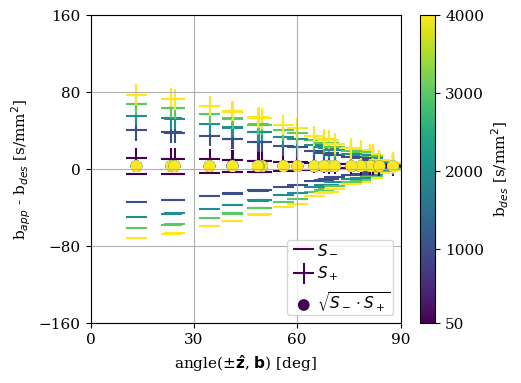

In [17]:
%matplotlib inline

for scans in scan_sessions:

    for scan in scans[:1]:

        cmap = plt.cm.get_cmap('viridis')

        fig, axs = plt.subplots(1, 1, figsize=(5, 4))

        for bvecs, bvals, bvals_eff, marker in zip(
            [scan.bvecs_negative, scan.bvecs_positive, scan.bvecs_negative], 
            [scan.bvals_negative, scan.bvals_positive, scan.bvals_cross],
            [scan.bvals_eff_negative, scan.bvals_eff_positive, scan.bvals_eff_cross],
            ['_', '+', '.'],
        ):

            angles_bs_z = utils.get_angles_between_vectors(vecs=bvecs, vec=[0, 0, 1])
            angles_bs_z[angles_bs_z>90] = 180 - angles_bs_z[angles_bs_z>90]

            p = axs.scatter(angles_bs_z, (bvals_eff-bvals), c=bvals, 
                            marker=marker, s=220)
        axs.grid(True)

        cbar = fig.colorbar(p, ax=axs)
        cbar.set_label('b$_{des}$ [s/mm$^2$]')
        cbar.set_ticks(np.unique(scan.bvals.flatten()))

        axs.set_ylabel('b$_{app}$ - b$_{des}$ [s/mm$^2$]')
        axs.set_xlabel('angle($\pm\mathbf{\hat{z}}$, $\mathbf{b}$) [deg]')
        axs.set_xlim(0, 90)
        axs.set_xticks(np.linspace(0, 90, 4))
        axs.set_yticks(np.linspace(-160, 160, 5))
        axs.legend(
            ['$S_-$', '$S_+$', '$\sqrt{S_- \cdot S_+}$'], 
            loc='lower right', 
            handletextpad=-0.1, 
            borderpad=0.1,
        )

        plt.show()

# COLORING

In [18]:
# get color from colormap based on the orientation of the scan
# asign color to scan object

cmap = plt.cm.get_cmap('viridis')

for scans in scan_sessions:

    for i, scan in enumerate(scans):

        weight = float(scan.tag.replace(' deg', '').split(',')[0]) / 90

        print(scan.tag)
        print(weight)

        scan.color = cmap(weight)

0 deg, PGSE
0.0
90 deg, PGSE
1.0
30 deg, PGSE
0.3333333333333333
60 deg, PGSE
0.6666666666666666


/tmp/ipykernel_276876/1747564895.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis')


# DTI MODELING

#### INSPECT CHOICE OF _signal_threshold

voxels oi:  478


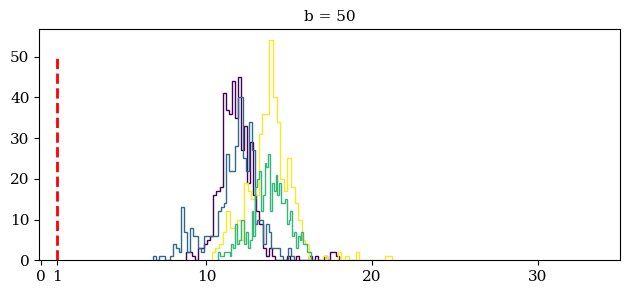

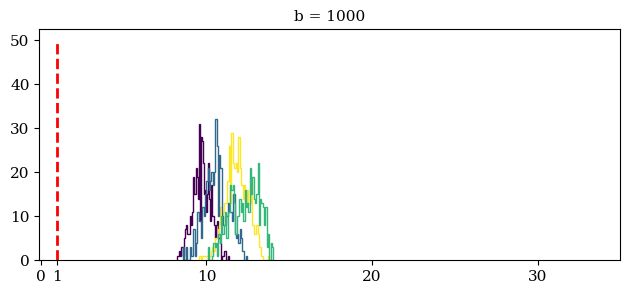

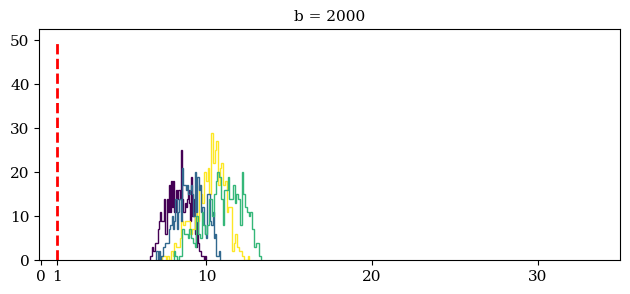

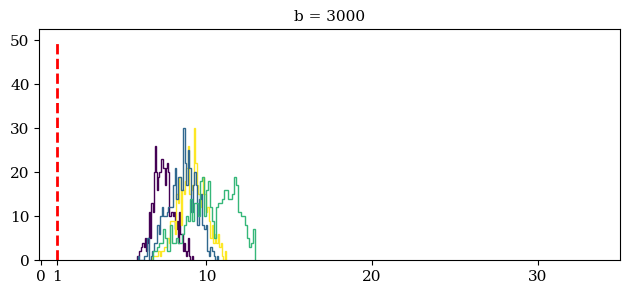

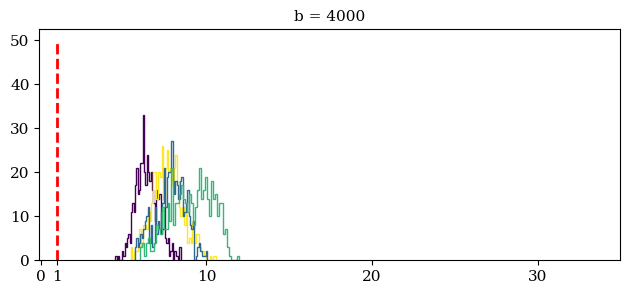

In [19]:
%matplotlib inline

#### mask to inspect

# CC
mask = (scans[0].mask_ROIs == labels_ROIs['CC'])
    
# CING-L
# mask = (scans[0].mask_ROIs == labels_ROIs['CING-L'])

# CING-R
# mask = (scans[0].mask_ROIs == labels_ROIs['CING-R'])
    
print('voxels oi: ', np.prod(mask.shape) - np.sum(np.logical_not(mask)))

_signal_threshold = 1.0

for bval in scans[0].bvals_unique:
    
    idx_bval = np.argwhere(scan.bvals == bval)[0, 0]
    
    plt.figure(figsize=figsize_3x1)

    for scan in scans:

        # no normalizing
        V_cross = scan.V_cross

        plt.hist(V_cross[mask, idx_bval], bins=50, color=scan.color, histtype='step', lw=lw)

    plt.title(f'b = {bval}')
    
    plt.plot([_signal_threshold, _signal_threshold], [0, 50], color='red', lw=lw, ls='--')
    plt.xlim(-0.1, 35)
    plt.xticks([0, _signal_threshold, 10, 20, 30, ])


### FIT

In [22]:
# b-values of the given scan

scan.bvals_unique

array([  50, 1000, 2000, 3000, 4000])

In [25]:
#### b-values to fit

bs_oi = [50, 1000, 3000, 4000]
# bs_oi = [4000, 8000, 12000]
# bs_oi = [8000, 12000, 20000]

#### fit
for scans in scan_sessions:

    for scan in tqdm(scans):

        print(scan.V_cross.shape)

        print(np.sum(np.isnan(scan.V_cross)))

        V_cross = scan.V_cross
        min_signal = 1
        
        V_cross[np.isnan(V_cross)] = 1.

        print(np.sum(np.isnan(V_cross)))

        mask_b = np.zeros(scan.bvals_eff_cross.shape).astype(bool)

        for b_oi in bs_oi:
            mask_b = mask_b + (scan.bvals_eff_cross > b_oi-500) * (scan.bvals_eff_cross < b_oi+500)
            
        mask_b = mask_b[:, 0]

        scan.fit_DTI(
            scan.bvals_eff_cross[mask_b, 0], scan.bvecs_positive[mask_b], 
            volume=V_cross[:, :, :, mask_b],
            big_delta=0.0202, small_delta=0.0072, 
            b0_threshold=np.max(bs_oi)+500,
            b_thres=np.max(bs_oi)+500,
            min_signal=min_signal
        )

  0%|          | 0/4 [00:00<?, ?it/s]

(60, 60, 38, 105)
0
0
(60, 60, 38, 105)
0
0
(60, 60, 38, 105)
0
0
(60, 60, 38, 105)
0
0


# INSPECT DTI MAPS

In [29]:
%matplotlib widget
plt.close('all')

for scans in scan_sessions:

    for scan in scans:
        
        print(scan.tag)

        RGB = np.copy(scan.RGB)
        alpha = np.ones((scan.V_cross[..., 1].shape))
        RGB = np.append(RGB, alpha[..., None], axis=-1)

        print(scan.eval1.shape)

        #ImageSliceViewer3D([scan.eval1[:, :, :], RGB], [1.0, 0.7])
        ImageSliceViewer3D([scan.cfa[:, :, 0, :, :]], [1.0])
        # ImageSliceViewer3D([scan.FA[:, :, :], RGB], [1.0, 0.7])
        # ImageSliceViewer3D([scan.FA[:, :, :]], [1.0])
    
%matplotlib inline

0 deg, PGSE
(60, 60, 38)


interactive(children=(RadioButtons(description='Slice plane:', options=('x-y', 'y-z', 'z-x'), value='x-y'), Ou…

90 deg, PGSE
(60, 60, 38)


interactive(children=(RadioButtons(description='Slice plane:', options=('x-y', 'y-z', 'z-x'), value='x-y'), Ou…

30 deg, PGSE
(60, 60, 38)


interactive(children=(RadioButtons(description='Slice plane:', options=('x-y', 'y-z', 'z-x'), value='x-y'), Ou…

60 deg, PGSE
(60, 60, 38)


interactive(children=(RadioButtons(description='Slice plane:', options=('x-y', 'y-z', 'z-x'), value='x-y'), Ou…

### MASKING

In [30]:
thres_FA = 0.6
thres_angles = 30

In [31]:
%matplotlib notebook
dpi = 100
plt.rcParams['figure.dpi'] = dpi
plt.close('all')

for scans in scan_sessions:

    for scan in scans:

        mask_FA = scan.FA > thres_FA

        #### CC
        dir_fiber = [1., 0., 0.]
        _evecs_oi = scan.evecs[:, :, 0, :, :, 0][(scans[0].mask_ROIs == labels_ROIs['CC'])]
        print('CC: ', dir_fiber)
        angles = utils.get_angles_between_vectors(scan.evecs[:, :, 0, :, :, 0], vec=dir_fiber)
        mask_angles = angles < thres_angles
        # mask y
        x_grid, y_grid = np.meshgrid(np.arange(scan.MD.shape[0]), np.arange(scan.MD.shape[1]))
        mask_y_idx = (y_grid < 15)#(y_grid < np.inf) #(y_grid < 15)#(y_grid > 25) #* (y_grid < 60)
        mask_y_idx = np.repeat(mask_y_idx[..., np.newaxis], scan.MD.shape[2], axis=2)
        # mask z
        z_grid, x_grid = np.meshgrid(np.arange(scan.MD.shape[2]), np.arange(scan.MD.shape[1]))
        mask_z_idx = (z_grid < 21)#(z_grid < 21)#(z_grid > 20) #(z_grid < 21)
        mask_z_idx = np.repeat(mask_z_idx[np.newaxis, :, :], scan.MD.shape[0], axis=0)
        
        mask_CC = mask_y_idx * mask_z_idx * mask_angles * mask_FA * (scans[0].mask_ROIs == labels_ROIs['CC'])
        print('mask_CC: ', np.prod(mask_CC.shape) - np.sum(np.logical_not(mask_CC)))
        scan.mask_CC = mask_CC
        
        #### CING-L
        dir_fiber = [0., 1., 0.]
        print('CING-L: ', dir_fiber)
        angles = utils.get_angles_between_vectors(scan.evecs[:, :, 0, :, :, 0], vec=dir_fiber)
        mask_angles = angles < thres_angles
        mask_CINGL = mask_angles * mask_FA * (scans[0].mask_ROIs == labels_ROIs['CING-L'])
        print('mask_CINGL: ', np.prod(mask_CINGL.shape) - np.sum(np.logical_not(mask_CINGL)))
        scan.mask_CINGL = mask_CINGL

        #### CING-R
        dir_fiber = [0., 1., 0.]
        print('CING-R: ', dir_fiber)
        angles = utils.get_angles_between_vectors(scan.evecs[:, :, 0, :, :, 0], vec=dir_fiber)
        mask_angles = angles < thres_angles
        mask_CINGR = mask_angles * mask_FA * (scans[0].mask_ROIs == labels_ROIs['CING-R'])
        print('mask_CINGR: ', np.prod(mask_CINGR.shape) - np.sum(np.logical_not(mask_CINGR)))
        scan.mask_CINGR = mask_CINGR
        
        #mask_oi = mask_CINGL
        # mask_oi = mask_CINGR
        mask_oi = mask_CC

        print(scan.tag+'\n')

CC:  [1.0, 0.0, 0.0]
mask_CC:  156
CING-L:  [0.0, 1.0, 0.0]
mask_CINGL:  161
CING-R:  [0.0, 1.0, 0.0]
mask_CINGR:  110
0 deg, PGSE

CC:  [1.0, 0.0, 0.0]
mask_CC:  156
CING-L:  [0.0, 1.0, 0.0]
mask_CINGL:  143
CING-R:  [0.0, 1.0, 0.0]
mask_CINGR:  72
90 deg, PGSE

CC:  [1.0, 0.0, 0.0]
mask_CC:  156
CING-L:  [0.0, 1.0, 0.0]
mask_CINGL:  126
CING-R:  [0.0, 1.0, 0.0]
mask_CINGR:  96
30 deg, PGSE

CC:  [1.0, 0.0, 0.0]
mask_CC:  156
CING-L:  [0.0, 1.0, 0.0]
mask_CINGL:  165
CING-R:  [0.0, 1.0, 0.0]
mask_CINGR:  106
60 deg, PGSE



# PA vs. $1/\sqrt{b}$

Only for scans_b where high b-values were 

In [32]:
scan.bvals_unique

array([  50, 1000, 2000, 3000, 4000])

In [37]:
%matplotlib inline

if 'scans_b' in locals():

    plt.close('all')
    
    size_font = 11
    
    plt.rc('font', family='serif')
    plt.rc('font', size=size_font)        # controls default text sizes
    plt.rc('axes', titlesize=size_font)   # fontsize of the axes title
    plt.rc('axes', labelsize=size_font)   # fontsize of the x and y labels
    plt.rc('xtick', labelsize=size_font)  # fontsize of the tick labels
    plt.rc('ytick', labelsize=size_font)  # fontsize of the tick labels
    plt.rc('legend', fontsize=size_font)  # legend fontsize
    plt.rc('figure', titlesize=size_font) # fontsize of the figure title
    
    plt.rcParams['figure.dpi'] = 400
    
    ####
    
    fig, axs = plt.subplots(1, 3, figsize=figsize_3x1)
    
    # bvals_oi = scan.bvals_unique
    bvals_oi = [1000, 3000, 4000, 8000, 12000, 20000]
    
    def func_line(x, a, b):
        return a + x*b
    
    for scan in scans_b:
        
        for label, idx_label in labels_ROIs.items():
            
            axs[idx_label-1].set_title(label)
            
            if label == 'CING-L':
                mask_oi = scan.mask_CINGL
            elif label == 'CING-R':
                mask_oi = scan.mask_CINGR
            elif label == 'CC':
                mask_oi = scan.mask_CC
                 
            PAs = []
            
            for bval in bvals_oi:
        
                PAs.append(np.mean(scan.V_cross[:, :, :, (scan.bvals_cross == bval)[:, 0]], axis=-1)[mask_oi])
            
            PAs = np.array(PAs)
            # normalize
            PAs = PAs / PAs[0, :] # to lowest b
            
            xs = 1/np.sqrt(bvals_oi)
            ys = np.mean(PAs, axis=-1)
            ys_std = np.std(PAs, axis=-1)
            
            axs[idx_label-1].plot(xs, ys, 
                                  marker='o', ms=4, alpha=0.5, color=scan.color,
                                  linestyle=':', lw=2)
            
            #### linear fit
            bvals_fit = np.array([8000, 12000, 20000])
            #bvals_fit = np.array([3000, 4000, 8000])
            #bvals_fit = np.array([1000, 3000, 4000])
            PAs_fit = ys[np.array([b in bvals_fit for b in bvals_oi])]
            PAs_std_fit = ys_std[np.array([b in bvals_fit for b in bvals_oi])]
            
            popt, pcov = curve_fit(func_line, 1/np.sqrt(bvals_fit), PAs_fit)
            a, b = popt
            a_std, b_std = np.sqrt(np.diag(pcov))
            axs[idx_label-1].plot(xs, func_line(xs, a, b), 
                                  color=scan.color)
            
            SS_res = np.sum((PAs_fit - func_line(1/np.sqrt(bvals_fit), a, b))**2)
            SS_tot = np.sum((PAs_fit - np.mean(PAs_fit))**2)
            R2 = 1 - SS_res / SS_tot
            print('%.4f' %R2)
            
            #break
        
    xticks = 1/np.sqrt(bvals_oi)
    xtick_labels = ['1/$\sqrt{'+str(int(v/1000))+'}$' for v in bvals_oi]
    
    for ax in axs:
        ax.grid(True)
        ax.set_xticks(xticks)
        ax.set_xticklabels(xtick_labels, rotation=90, fontsize=8)
        #ax.set_ylim(-0.1, 12.5)
        #ax.set_ylim(-0.1, 1.1)
        ax.set_ylim(0.25, 1.1)
        #ax.set_xscale('log')
        #ax.set_yscale('log')
        ax.set_xlabel('$1/\sqrt{b}$ [$\mu m$/$\sqrt{ms}$]')
        ax.set_ylabel('PA [-]')
        
    plt.tight_layout()
    
    path_figure = path_figures + f'PA_vs_1oversqrtofb'
    plt.savefig(path_figure, dpi=400)

#### GET LEGEND

In [39]:
if 'scans_b' in locals():

    fig, ax = plt.subplots(1, 1, figsize=figsize_3x1)
    
    ax.axis('off')
    
    for scan in scans_b:
        
        label = r'$\theta = $' + scan.tag.split(', ')[0]
    
        ax.plot([0], [0], marker='o', ms=4, alpha=1, linestyle=':', color=scan.color, label=label)
        
    ax.legend()
    
    _handles, _labels = ax.get_legend_handles_labels()
    _handles, _labels = np.array(_handles), np.array(_labels)
    mask_order = np.array([0, 2, 3, 1])
    ax.legend(_handles[mask_order], _labels[mask_order], loc='upper center', borderaxespad=0., ncol=4)
    
    plt.tight_layout()
    path_figure = path_figures + 'PA_vs_1oversqrtofb_legend'
    plt.savefig(path_figure, dpi=400)

In [42]:
if 'scans_b' in locals():

    print(stats.chisquare(f_obs=PAs_fit, f_exp=func_line(1/np.sqrt(bvals_fit), a, b), ddof=1))

    chi2 = np.sum((PAs_fit - func_line(1/np.sqrt(bvals_fit), a, b))**2 / PAs_std_fit**2)
    print(chi2)

    print(1 - stats.chi2.cdf(chi2, 1))

### DTI: ADC

In [43]:
#### MODELS

def model_a(x, a, b):
    # horizontal line
    return a + 0.0*x*b

def model_b(x, a, b):
    x = np.deg2rad(x)
    return a + b*np.cos(x)**2

def model_c(x, a, b):
    x = np.deg2rad(x)
    return a + b*np.cos(2*x)**2

def model_d(x, a, b):
    x = np.deg2rad(x)
    return a + b*np.cos(x - np.pi/2)**2

models = [model_a, model_b, model_c, model_d]

MD: p1/p0 = 0.06
AD: p1/p0 = 0.05

RMSE
	MD		AD		RD
model_a 5.15e-12	5.02e-11	0.00e+00
model_b 0.00e+00	0.00e+00	5.59e-12
model_c 1.38e-11	5.81e-11	7.71e-12
model_d 1.36e-11	5.56e-11	6.80e-12

AIC
	MD	AD	RD
model_a 10.75	11.60	0.00
model_b 0.00	0.00	12.40
model_c 33.51	15.72	16.31
model_d 33.17	15.06	14.65


MD: p1/p0 = 0.11
AD: p1/p0 = 0.11
RD: p1/p0 = 0.12

RMSE
	MD		AD		RD
model_a 5.67e-11	2.44e-10	1.09e-11
model_b 0.00e+00	0.00e+00	0.00e+00
model_c 5.66e-11	1.84e-10	2.13e-11
model_d 6.54e-11	2.46e-10	2.28e-11

AIC
	MD	AD	RD
model_a 284.15	111.08	26.93
model_b 0.00	0.00	0.00
model_c 285.66	87.23	55.37
model_d 319.74	113.87	59.04


MD: p1/p0 = 0.10
AD: p1/p0 = 0.08

RMSE
	MD		AD		RD
model_a 8.58e-12	1.04e-10	0.00e+00
model_b 0.00e+00	0.00e+00	1.73e-11
model_c 1.47e-11	1.13e-10	3.05e-12
model_d 1.88e-11	1.42e-10	9.58e-12

AIC
	MD	AD	RD
model_a 64.37	75.00	0.00
model_b 0.00	0.00	59.69
model_c 107.81	83.53	12.81
model_d 133.06	102.16	34.96


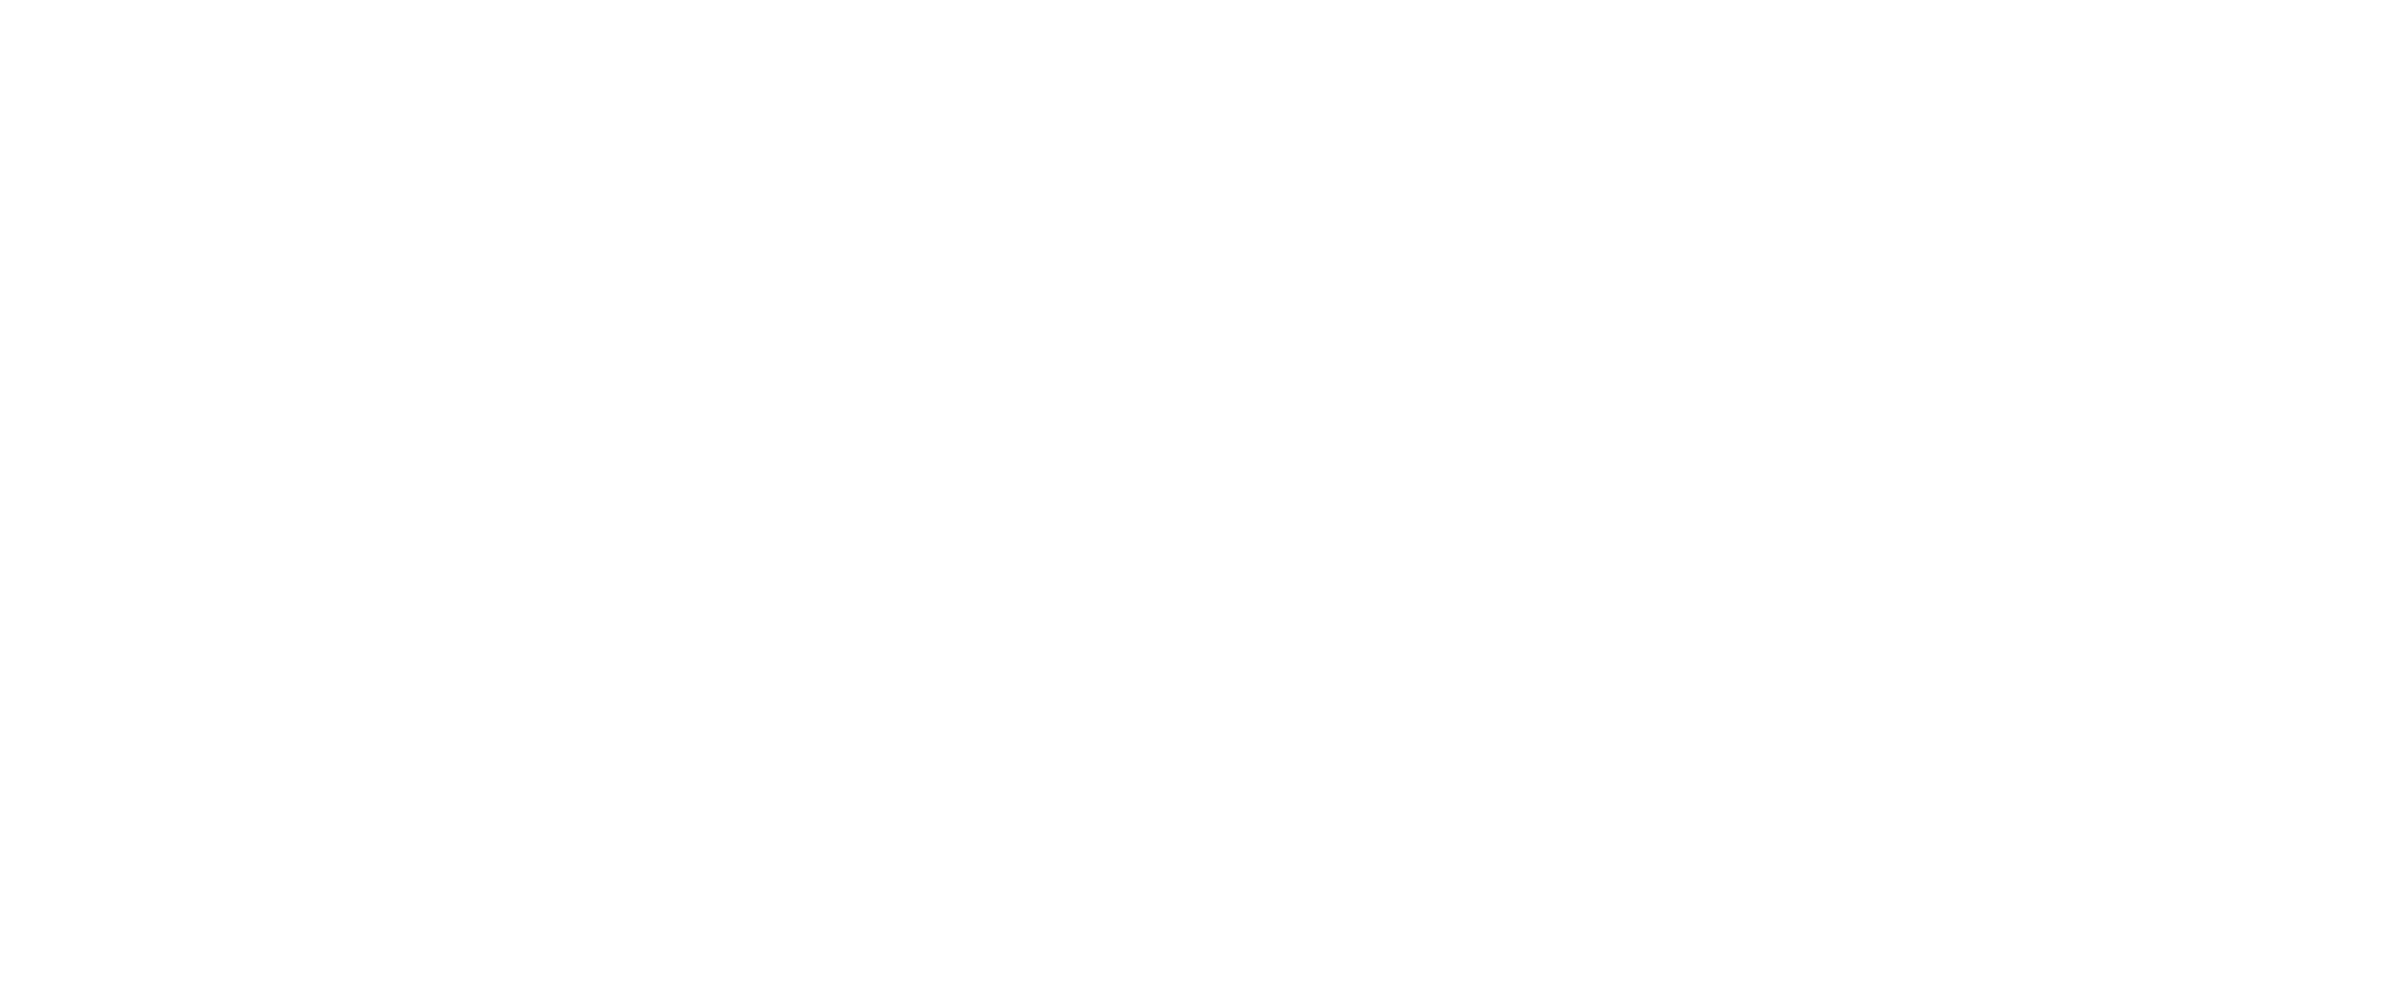

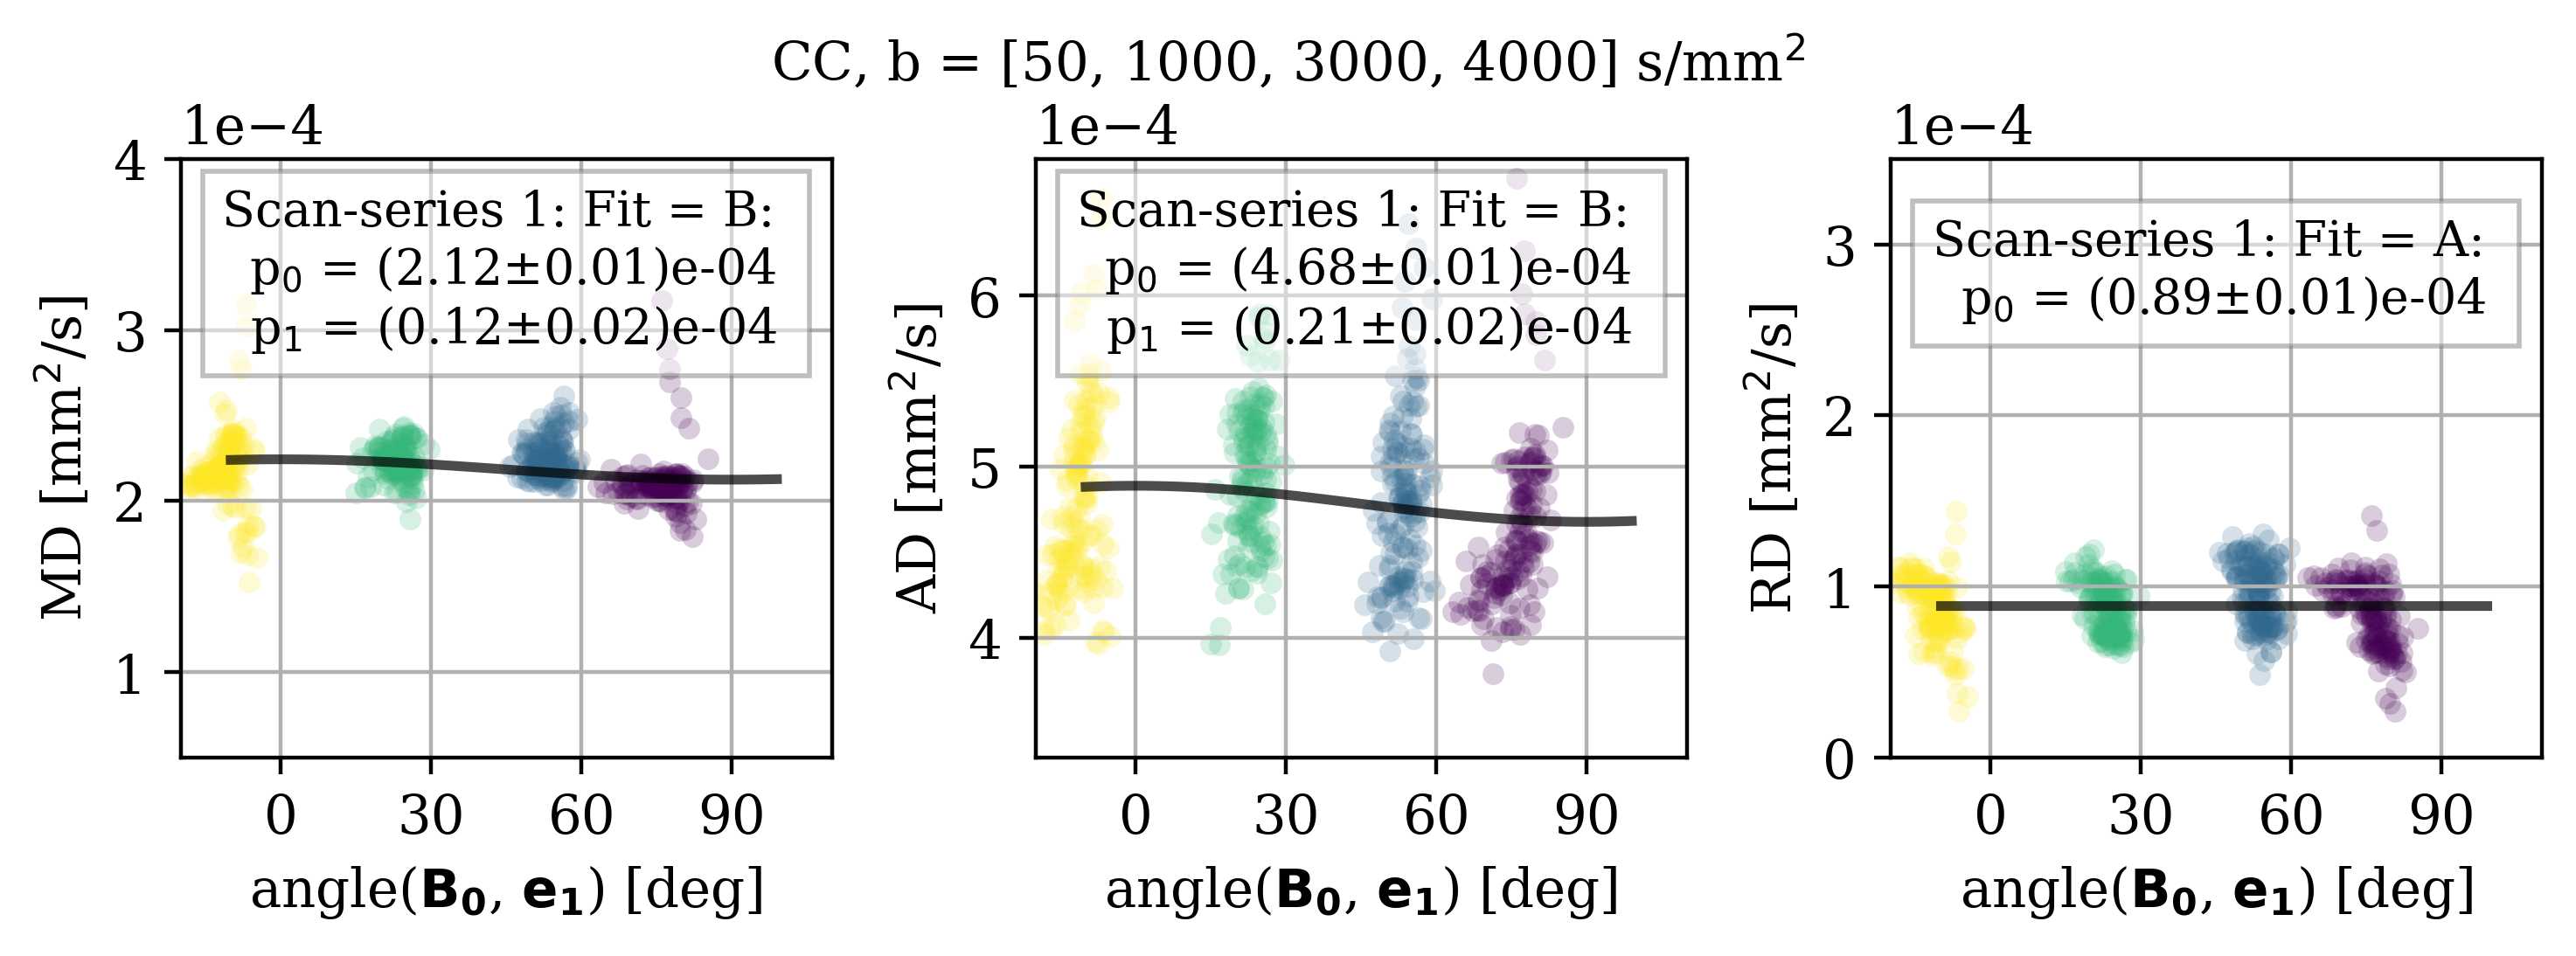

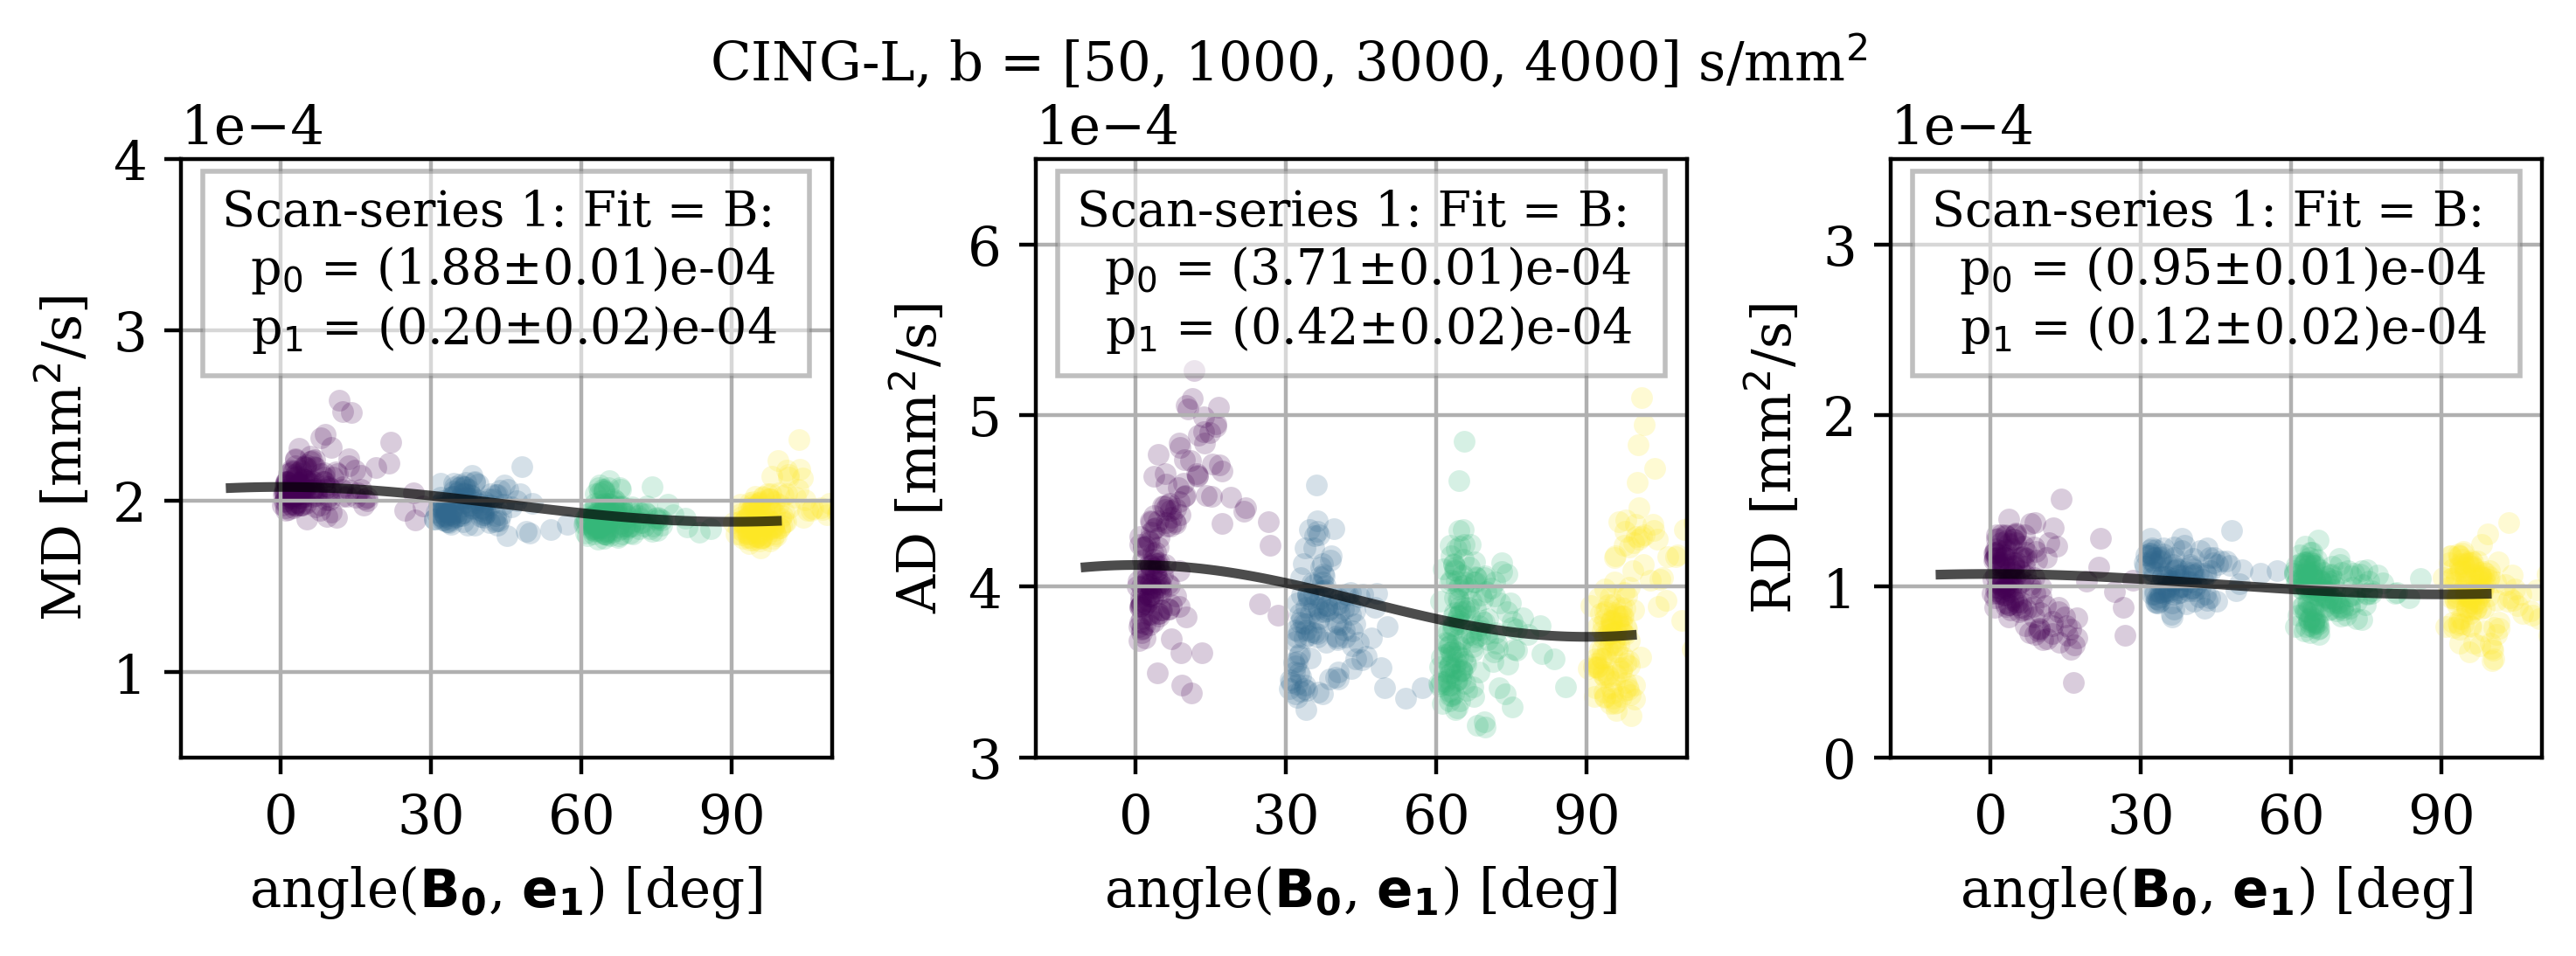

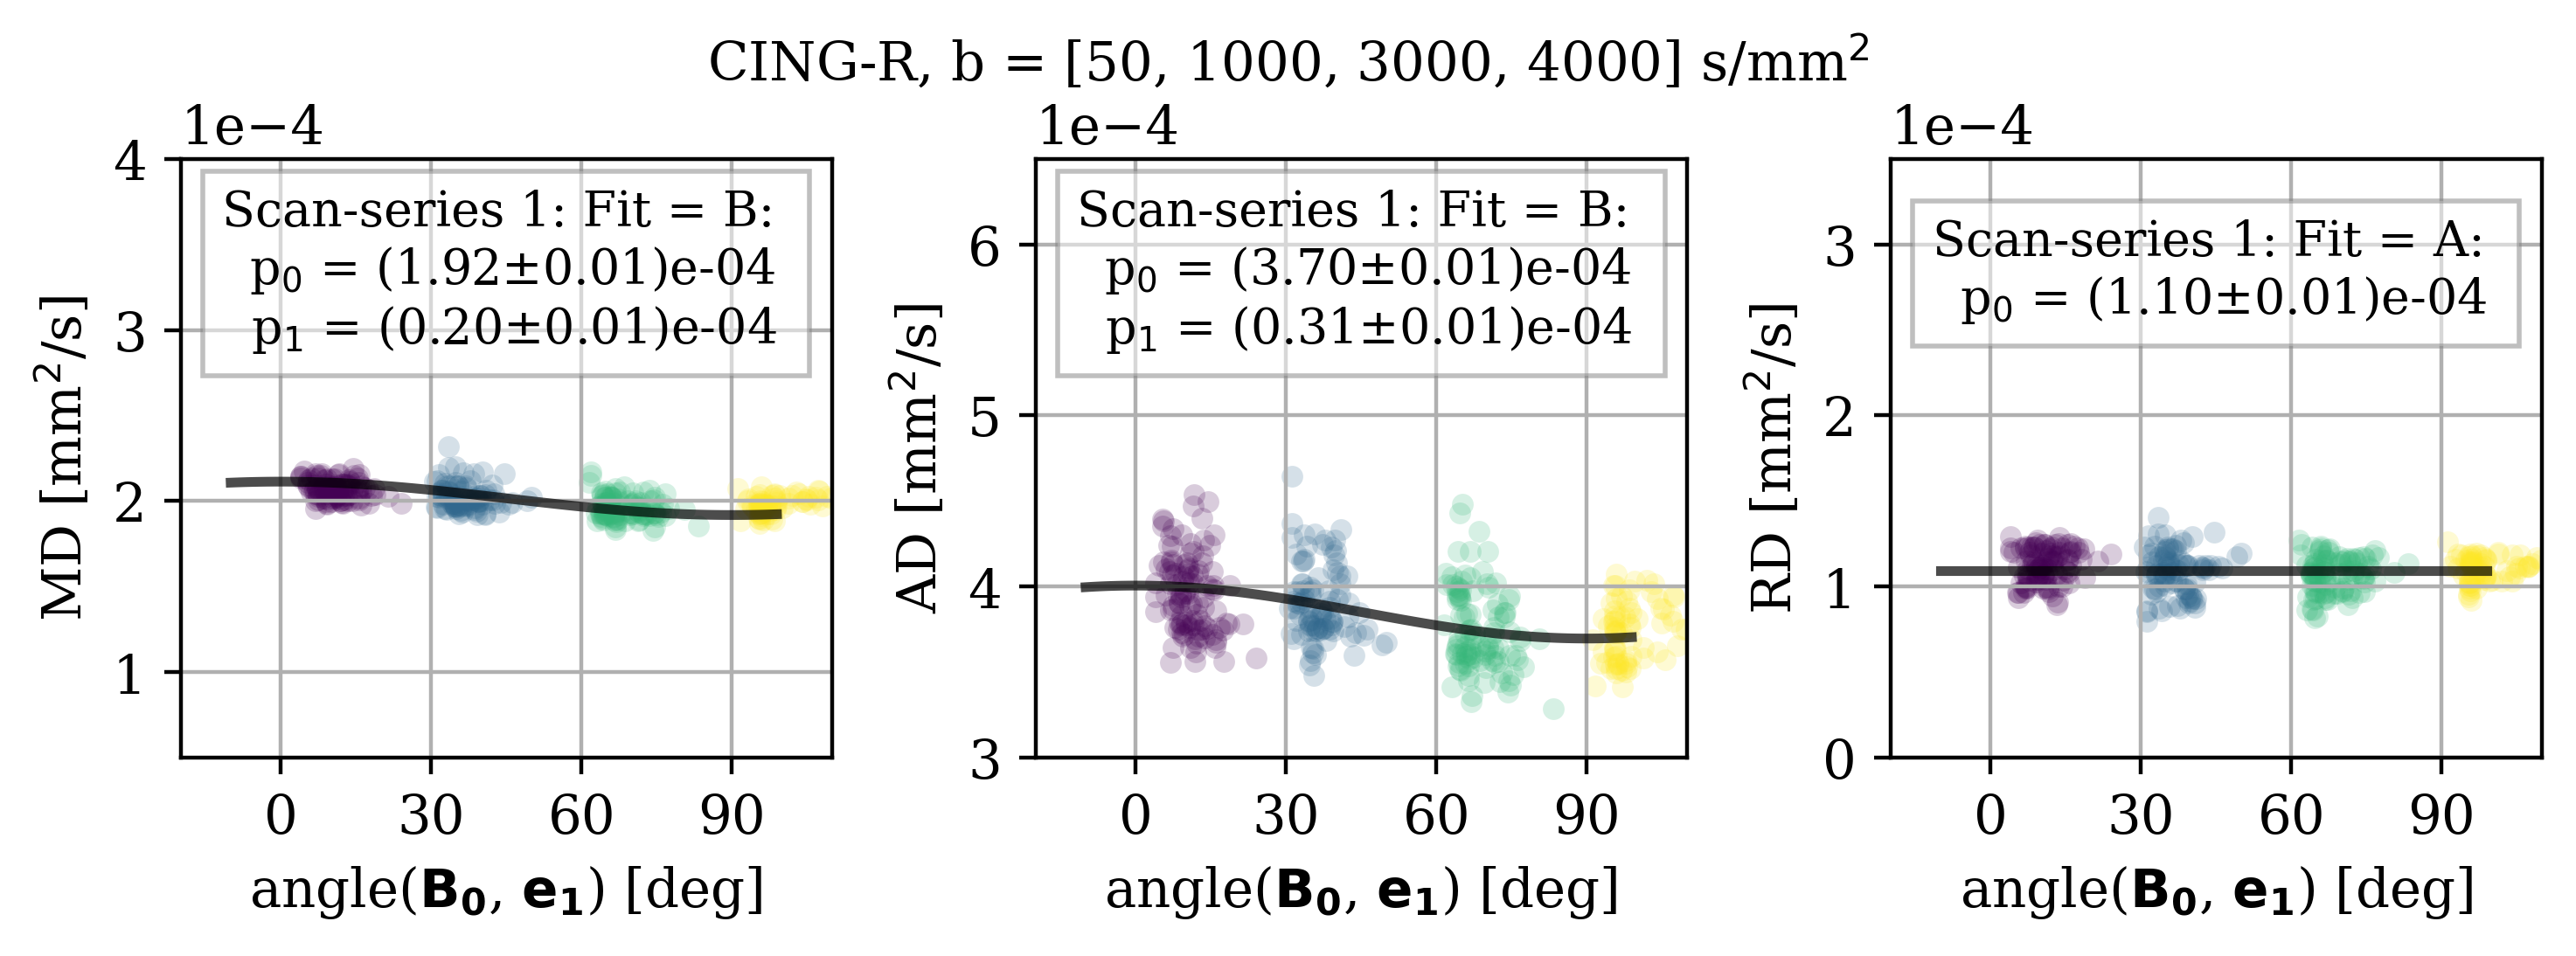

In [44]:
%matplotlib inline

plt.close('all')

size_font = 11

tag_figure = ''

plt.rc('font', family='serif')
plt.rc('font', size=size_font)        # controls default text sizes
plt.rc('axes', titlesize=size_font)   # fontsize of the axes title
plt.rc('axes', labelsize=size_font)   # fontsize of the x and y labels
plt.rc('xtick', labelsize=size_font)  # fontsize of the tick labels
plt.rc('ytick', labelsize=size_font)  # fontsize of the tick labels
plt.rc('legend', fontsize=size_font)  # legend fontsize
plt.rc('figure', titlesize=size_font) # fontsize of the figure title

plt.rcParams['figure.dpi'] = 400

# for confidence interval, have a look here: https://stackoverflow.com/a/65496207/7335087

ms = 16
alpha_scatter = 0.2#0.7 # 0.4
lw = 2
mew = 1
s = 20 #60 #20

report = ''

fig_legend, axs_legend = plt.subplots(1, 3, figsize=figsize_3x1)
for ax in axs_legend:
    ax.axis('off')

markers = ['X']

scaler_a = 1e4
scaler_b = 1e4

for label, idx_label in labels_ROIs.items():
    
    fig, axs = plt.subplots(1, 3, figsize=figsize_3x1)
    fig.suptitle(label+f', b = {bs_oi} s/mm$^2$', y=0.9)

    #### FOR TABLE PRINTING
    AIC_MD_ref = np.inf
    AIC_AD_ref = np.inf
    AIC_RD_ref = np.inf
    
    display(HTML(f'<b><u>\n\tLabel: {label}</u></b>'))
    display(HTML(f'<b>\nscan-series: {2}</b>'))
    
    RMSEs = {}
    RMSEs['MD'] = {}
    RMSEs['AD'] = {}
    RMSEs['RD'] = {}
    
    AICs = {}
    AICs['MD'] = {}
    AICs['AD'] = {}
    AICs['RD'] = {}
    
    for marker in markers:
    
        for key, value in RMSEs.items():
            RMSEs[key][marker] = {}

        for key, value in AICs.items():
            AICs[key][marker] = {}
    
    for idx_model, model in enumerate(models):
        
        tag_model = model.__name__.split('_')[-1].upper()
        
        if model.__name__ == 'model_a':
            K = 1
        else:
            K = 2
        
        report += model.__name__ + '\n'
        
        for scans, idx_scan_series, marker, ls, linewidth in zip(scan_sessions, idxs_scan_series, markers, ['-',], [0.0,]):
            
    
            ADCs = np.array([])
            ADCs_angles_oi = np.array([])

            ADC_paras = np.array([])
            ADC_paras_angles_oi = np.array([])

            ADC_perps = np.array([])
            ADC_perps_angles_oi = np.array([])

            for scan in scans:
                
                deg = float(scan.tag.split(' ')[0])

                if label == 'CING-L':
                    mask_oi = scan.mask_CINGL
                    _evecs_oi = scan.evecs[:, :, 0, :, :, 0][mask_oi]
                    _angles_oi = utils.get_angles_between_vectors(_evecs_oi, vec=[0., 1., 0.])
                    _angles_oi = _angles_oi + deg

                    if bs_oi == [50, 1000, 3000, 4000]:
                        axs[0].set_ylim(0.5e-4, 4.0e-4)
                        axs[1].set_ylim(3.0e-4, 6.5e-4)
                        axs[2].set_ylim(0.0e-4, 3.5e-4)
                    elif bs_oi == [8000, 12000, 20000]:
                        axs[0].set_ylim(0.0e-4, 3.5e-4)
                        axs[1].set_ylim(0.0e-4, 3.5e-4)
                        axs[2].set_ylim(0.0e-4, 3.5e-4)
                    else:
                        axs[0].set_ylim(0.0e-4, 3.5e-4)
                        axs[1].set_ylim(1.0e-4, 4.5e-4)
                        axs[2].set_ylim(0.0e-4, 3.5e-4)
                        
                elif label == 'CING-R':
                    mask_oi = scan.mask_CINGR
                    _evecs_oi = scan.evecs[:, :, 0, :, :, 0][mask_oi]
                    _angles_oi = utils.get_angles_between_vectors(_evecs_oi, vec=[0., 1., 0.])
                    _angles_oi = _angles_oi + deg

                    if bs_oi == [50, 1000, 3000, 4000]:
                        axs[0].set_ylim(0.5e-4, 4.0e-4)
                        axs[1].set_ylim(3.0e-4, 6.5e-4)
                        axs[2].set_ylim(0.0e-4, 3.5e-4)
                    elif bs_oi == [8000, 12000, 20000]:
                        axs[0].set_ylim(0.0e-4, 3.5e-4)
                        axs[1].set_ylim(0.0e-4, 3.5e-4)
                        axs[2].set_ylim(0.0e-4, 3.5e-4)
                    else:
                        axs[0].set_ylim(0.0e-4, 3.5e-4)
                        axs[1].set_ylim(1.0e-4, 4.5e-4)
                        axs[2].set_ylim(0.0e-4, 3.5e-4)
                        
                elif label == 'CC':
                    mask_oi = scan.mask_CC
                    _evecs_oi = scan.evecs[:, :, 0, :, :, 0][mask_oi]
                    _angles_oi = utils.get_angles_between_vectors(_evecs_oi, vec=[0., 1., 0.])
                    _angles_oi = _angles_oi - deg

                    if bs_oi == [50, 1000, 3000, 4000]:
                        axs[0].set_ylim(0.5e-4, 4.0e-4)
                        if marker == 's': axs[1].set_ylim(3.7e-4, 7.2e-4)
                        if marker == 'X': axs[1].set_ylim(3.3e-4, 6.8e-4)
                        axs[2].set_ylim(0.0e-4, 3.5e-4)
                    elif bs_oi == [8000, 12000, 20000]:
                        axs[0].set_ylim(0.0e-4, 3.5e-4)
                        axs[1].set_ylim(0.0e-4, 3.5e-4)
                        axs[2].set_ylim(0.0e-4, 3.5e-4)
                    else:
                        axs[0].set_ylim(0.0e-4, 3.5e-4)
                        axs[1].set_ylim(1.0e-4, 4.5e-4)
                        axs[2].set_ylim(0.0e-4, 3.5e-4)
            
                #### ADC 
                
                ADC = scan.MD[mask_oi]

                ADCs = np.append(ADCs, ADC)
                ADCs_angles_oi = np.append(ADCs_angles_oi, _angles_oi)

                if idx_model == 0:
                    axs[0].scatter(_angles_oi, ADC, alpha=alpha_scatter, color=scan.color, 
                                   marker='o', linewidth=linewidth, s=s, 
                                   label=r'$\theta = $'+f'{scan.tag}'
                                  )

                    # MEAN
                    axs[0].set_xlabel(r'angle($\mathbf{B_0}$, $\mathbf{e_1}$) [deg]')
                    axs[0].set_ylabel('MD [mm$^2$/s]')
                    axs[0].grid(True)
                    axs[0].set_xticks([0, 30, 60, 90])
                    axs[0].set_xlim(-20, 110)
                    axs[0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

                #### ADC parallel
                ADC_para = scan.eval1[mask_oi]

                ADC_paras = np.append(ADC_paras, ADC_para)
                ADC_paras_angles_oi = np.append(ADC_paras_angles_oi, _angles_oi)

                if idx_model == 0:
                    axs[1].scatter(_angles_oi, ADC_para, alpha=alpha_scatter, color=scan.color, 
                                   marker='o', linewidth=linewidth, s=s, 
                                   label=r'$\theta = $'+f'{scan.tag}'
                                  )

                    # MEAN
                    axs[1].set_xlabel(r'angle($\mathbf{B_0}$, $\mathbf{e_1}$) [deg]')
                    axs[1].set_ylabel('AD [mm$^2$/s]')
                    #axs[1].set_yticklabels([])
                    axs[1].grid(True)
                    axs[1].set_xticks([0, 30, 60, 90])
                    axs[1].set_xlim(-20, 110)
                    axs[1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

                #### ADC perpendicular
                ADC_perp = np.mean([scan.eval2[mask_oi], scan.eval3[mask_oi]], axis=0)

                ADC_perps = np.append(ADC_perps, ADC_perp)
                ADC_perps_angles_oi = np.append(ADC_perps_angles_oi, _angles_oi)

                if idx_model == 0:
                    axs[2].scatter(_angles_oi, ADC_perp, alpha=alpha_scatter, color=scan.color, 
                                   marker='o', linewidth=linewidth, s=s,
                                   label=r'$\theta = $'+f'{scan.tag}'.replace(', PGSE', '')
                                  )

                    # MEAN
                    axs[2].set_xlabel(r'angle($\mathbf{B_0}$, $\mathbf{e_1}$) [deg]')
                    axs[2].set_ylabel(r'RD [mm$^2$/s]')
                    axs[2].grid(True)
                    axs[2].set_xticks([0, 30, 60, 90])
                    axs[2].set_xlim(-20, 110)
                    axs[2].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

                plt.tight_layout()

            #### FIT
            maxfev = 5000
            p0 = None
            bounds = None
            bounds = ([-np.inf, 0], [np.inf, np.inf])

            #### ADC
            popt, pcov = curve_fit(model, ADCs_angles_oi, ADCs, maxfev=maxfev, bounds=bounds)#, p0=p0, bounds=bounds)
            a, b = popt
            a_std, b_std = np.sqrt(np.diag(pcov))
            rmse = mean_squared_error(ADCs, model(ADCs_angles_oi, a, b))
            RMSEs['MD'][marker][model.__name__] = rmse
            RSS = np.sum((ADCs - model(ADCs_angles_oi, a, b))**2)
            AIC = 2 * K + len(ADCs) * np.log(RSS / len(ADCs))
            AICs['MD'][marker][model.__name__] = AIC
            
            if AIC < AIC_MD_ref:
                fit_MD = {}
                fit_MD['model'] = model
                fit_MD['a'] = a
                fit_MD['b'] = b
                AIC_MD_ref = AIC
                
            #### ADC_para
            popt, pcov = curve_fit(model, ADC_paras_angles_oi, ADC_paras, maxfev=maxfev, bounds=bounds)#, p0=p0, bounds=bounds)
            a, b = popt
            a_std, b_std = np.sqrt(np.diag(pcov))
            rmse = mean_squared_error(ADC_paras, model(ADC_paras_angles_oi, a, b))
            RMSEs['AD'][marker][model.__name__] = rmse
            RSS = np.sum((ADC_paras - model(ADC_paras_angles_oi, a, b))**2)
            AIC = 2 * K + len(ADC_paras) * np.log(RSS / len(ADC_paras))
            AICs['AD'][marker][model.__name__] = AIC
            
            if AIC < AIC_AD_ref:
                fit_AD = {}
                fit_AD['model'] = model
                fit_AD['a'] = a
                fit_AD['b'] = b
                AIC_AD_ref = AIC

            #### ADC_perp
            popt, pcov = curve_fit(model, ADC_perps_angles_oi, ADC_perps, maxfev=maxfev, bounds=bounds)#, p0=p0, bounds=bounds)
            a, b = popt
            a_std, b_std = np.sqrt(np.diag(pcov))
            rmse = mean_squared_error(ADC_perps, model(ADC_perps_angles_oi, a, b))
            RMSEs['RD'][marker][model.__name__] = rmse
            RSS = np.sum((ADC_perps - model(ADC_perps_angles_oi, a, b))**2)
            AIC = 2 * K + len(ADC_perps) * np.log(RSS / len(ADC_perps))
            AICs['RD'][marker][model.__name__] = AIC
            
            if AIC < AIC_RD_ref:
                fit_RD = {}
                fit_RD['model'] = model
                fit_RD['a'] = a
                fit_RD['b'] = b
                AIC_RD_ref = AIC    

    #### PLOT BEST FIT
    x_fit = np.arange(-10, 100, 1)

    ## MD
    model = fit_MD['model']
    tag_model = model.__name__.split('_')[-1].upper()
    a = fit_MD['a']
    b = fit_MD['b']
    if tag_model != 'A': print('MD: p1/p0 = %.2f' %(round(b/a, 2)))
    text_fit = f'Scan-series {idx_scan_series}: Fit = {tag_model}:'+' \n p$_0$ = (%.2f$\pm$%.2f)e-04 \n p$_1$ = (%.2f$\pm$%.2f)e-04' %(a*scaler_a, a_std*scaler_a, b*scaler_b, b_std*scaler_b)
    if model.__name__ == 'model_a': text_fit = text_fit.split(' \n p$_1$')[0]

    axs[0].plot(x_fit, model(x_fit, a, b), color='black', alpha=0.7, lw=lw, ls=ls)

    t = axs[0].text(0.5, 0.81, text_fit, ha='center', va='center', transform=axs[0].transAxes, fontsize=10)
    t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='gray'))
    
    ## AD
    model = fit_AD['model']
    tag_model = model.__name__.split('_')[-1].upper()
    a = fit_AD['a']
    b = fit_AD['b']
    if tag_model != 'A': print('AD: p1/p0 = %.2f' %(round(b/a, 2)))
    text_fit = f'Scan-series {idx_scan_series}: Fit = {tag_model}:'+' \n p$_0$ = (%.2f$\pm$%.2f)e-04 \n p$_1$ = (%.2f$\pm$%.2f)e-04' %(a*scaler_a, a_std*scaler_a, b*scaler_b, b_std*scaler_b)
    if model.__name__ == 'model_a': text_fit = text_fit.split(' \n p$_1$')[0]
    
    axs[1].plot(x_fit, model(x_fit, a, b), color='black', alpha=0.7, lw=lw, ls=ls)
    
    t = axs[1].text(0.5, 0.81, text_fit, ha='center', va='center', transform=axs[1].transAxes, fontsize=10)
    t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='gray'))
    
    ## RD
    model = fit_RD['model']
    tag_model = model.__name__.split('_')[-1].upper()
    a = fit_RD['a']
    b = fit_RD['b']
    if tag_model != 'A': print('RD: p1/p0 = %.2f' %(round(b/a, 2)))
    text_fit = f'Scan-series {idx_scan_series}: Fit = {tag_model}:'+' \n p$_0$ = (%.2f$\pm$%.2f)e-04 \n p$_1$ = (%.2f$\pm$%.2f)e-04' %(a*scaler_a, a_std*scaler_a, b*scaler_b, b_std*scaler_b)
    if model.__name__ == 'model_a': text_fit = text_fit.split(' \n p$_1$')[0]
    
    axs[2].plot(x_fit, model(x_fit, a, b), color='black', alpha=0.7, lw=lw, ls=ls)
    
    t = axs[2].text(0.5, 0.81, text_fit, ha='center', va='center', transform=axs[2].transAxes, fontsize=10)
    t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='gray'))
    
    #### SETUP
    for ax in axs:
        ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    ## legend
    axs[2].plot([], [], label='Scan-series 1:', color='white')
    axs[2].plot([], [], label='Scan-series 2:', color='white')

    plt.tight_layout()    
    
    #### PRINT REPORTS 
    for idx_scan_series, marker in zip(idxs_scan_series, markers):
        
        
        #### PRINT RMSE TABLE
        print('\nRMSE')
        As = []

        for name_metric, _models in RMSEs.items():

            a = np.array(list(_models[marker].values()))
            a -= np.min(a)

            As.append(a)

        As = np.array(As).T

        print('\tMD\t\tAD\t\tRD')
        for a, model in zip(As, models):
            print(model.__name__, '%.2e\t%.2e\t%.2e' %(a[0], a[1], a[2]))

        #### PRINT AIC TABLE
        print('\nAIC')
        As = []

        for name_metric, _models in AICs.items():

            a = np.array(list(_models[marker].values()))
            a -= np.min(a)

            As.append(a)

        As = np.array(As).T

        print('\tMD\tAD\tRD')
        for a, model in zip(As, models):
            print(model.__name__, '%.2f\t%.2f\t%.2f' %(a[0], a[1], a[2]))
            
            
    path_figure = os.path.join(path_figures, f'orientation_dependencies/idx_scan_series={idx_scan_series}-label={label}-bs_oi={bs_oi}{tag_figure}')
    
    if not os.path.exists(os.path.dirname(path_figure)):
        os.mkdir(os.path.dirname(path_figure))
        
    plt.savefig(path_figure, dpi=400)

##### GET LEGEND

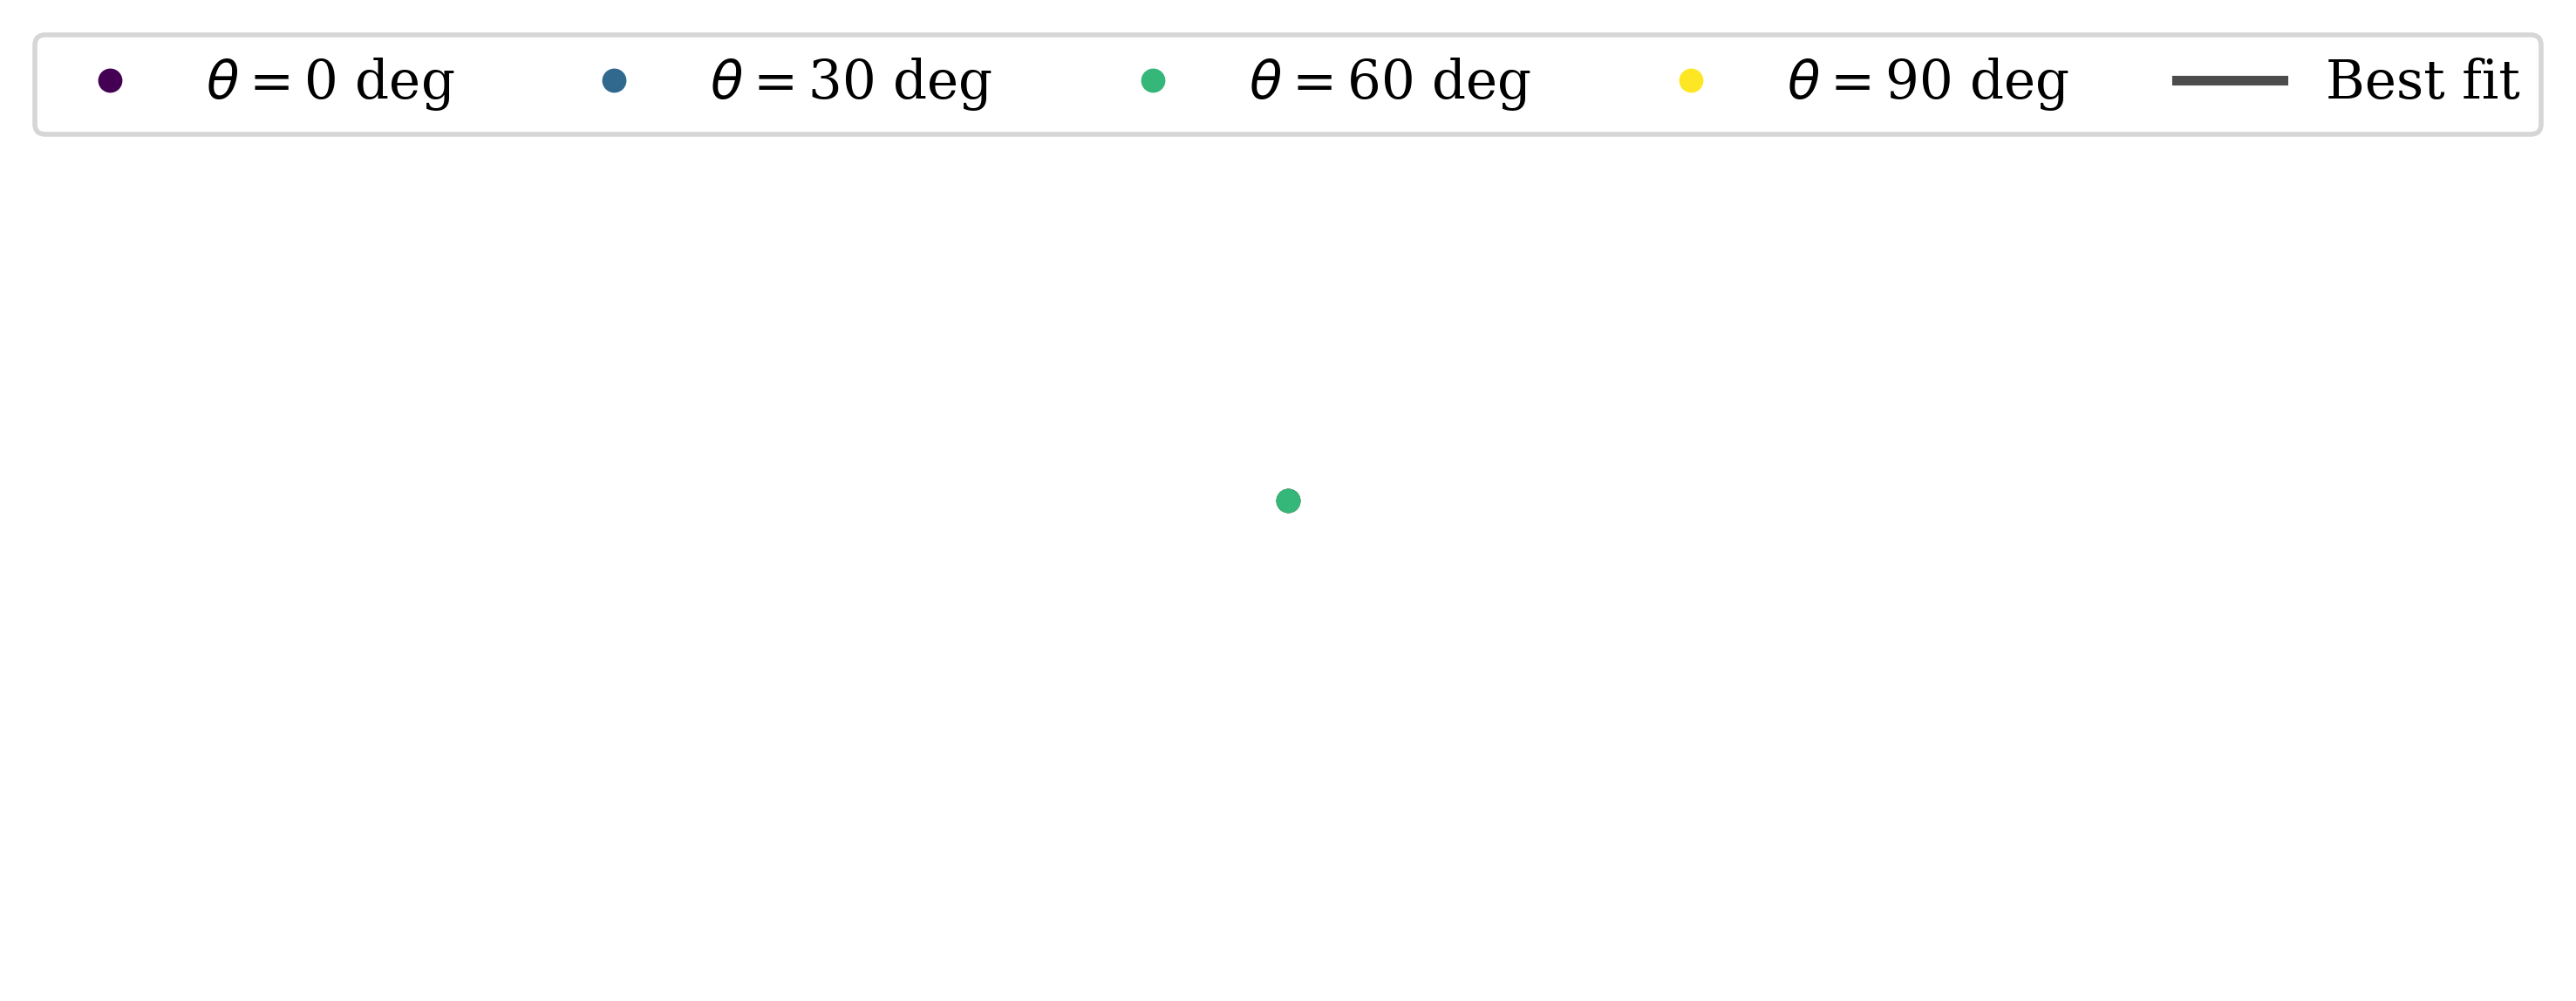

In [47]:
fig, ax = plt.subplots(1, 1, figsize=figsize_3x1)

ax.axis('off')

for scans in scan_sessions:

    for scan in scans:
        
        label = r'$\theta = $' + scan.tag.split(', ')[0]
    
        ax.plot([0], [0], marker='o', ms=4, alpha=1, linestyle='None', color=scan.color, label=label)
        
    ax.plot([0, 0], [0, 0], color='black', alpha=0.7, lw=lw, ls=ls, label='Best fit')
        
    ax.legend()
    
    _handles, _labels = ax.get_legend_handles_labels()
    _handles, _labels = np.array(_handles), np.array(_labels)
    mask_order = np.array([0, 2, 3, 1, 4])
    ax.legend(_handles[mask_order], _labels[mask_order], loc='upper center', borderaxespad=0., ncol=5)
    
    plt.tight_layout()
    path_figure = path_figures + 'orientation_dependencies/legend'
    plt.savefig(path_figure, dpi=400)